<a href="https://colab.research.google.com/github/abhinavtk1/ED5340-Codes/blob/main/MA23M002_LAB_13_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB13: PART 2


Taking any two classes from the above data, add labels to them (0 or 1) and create a new csv file. Split the data into Train / Test set as 70/30. (a) Plot the decision boundary using the developed logistic regression code (either with or without regularization) from one of your previous labs. (b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data without using any library.  (10 marks)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gen_data.csv')
df.head()

,x,y
0,2.587524,2.423344
1,2.111008,3.220615
2,2.363820,2.722110
3,2.998565,3.262109
4,2.309362,3.608433


In [ ]:
new_df = df.iloc[:20]

In [ ]:
label1 = [0]*10
label2 = [1]*10
labels = label1 + label2

In [ ]:
new_df['labels'] = labels

In [ ]:
new_df

,x,y,labels
0,2.587524,2.423344,0
1,2.111008,3.220615,0
2,2.363820,2.722110,0
3,2.998565,3.262109,0
4,2.309362,3.608433,0
5,2.514524,2.764671,0
6,2.767556,2.823288,0
7,2.269909,2.984576,0
8,3.541846,3.383040,0
9,2.849660,3.195893,0


In [ ]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df[['x', 'y']], new_df['labels'], test_size=0.3, random_state=42)


(a) Plot the decision boundary using the developed logistic regression code (either with or without regularization) from one of your previous labs.

In [ ]:
# Decision boundary using logistic regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(z))

def gradient_desc(X,y):
    m = X.shape[0]
    n = X.shape[1]
    wt = np.zeros(n+1)
    X_train = np.zeros((m,n+1))
    X_train[:,0] = 1
    X_train[:,1:] = X
    loss_list = []
    lr = 0.01
    for iter in range(5000):
      y_hat = sigmoid(X_train.dot(wt))
      loss = (1/m)*(-y.dot(np.log(y_hat + 1e-8)) - (1-y).dot(np.log(1-y_hat+ 1e-8)))
      loss_list.append(loss)
      grad = (1/m)*X_train.T.dot(y_hat - y)
      wt = wt - lr*grad
    return wt, loss_list

In [ ]:
X = X_train[['x', 'y']]
y = y_train
# Normalization
X.loc[:,'x'] = (X['x'] - np.mean(X['x']))/np.std(X['x'])
X.loc[:,'y'] = (X['y'] - np.mean(X['y']))/np.std(X['y'])
wt, loss_list = gradient_desc(X,y)

In [ ]:
# decision bdry
x1_min, x1_max = X['x'].min(), X['x'].max()
x2_min, x2_max = X['y'].min(), X['y'].max()

In [ ]:
# creating data points
a = np.linspace(x1_min-1, x1_max+1 , 100)
b = np.linspace(x2_min-1, x2_max+1 , 100)
a,b = np.meshgrid(a,b)
x_db = np.c_[np.ones(a.ravel().shape[0]),a.ravel(),b.ravel()]
h_db = sigmoid(x_db.dot(wt)).reshape(a.shape)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

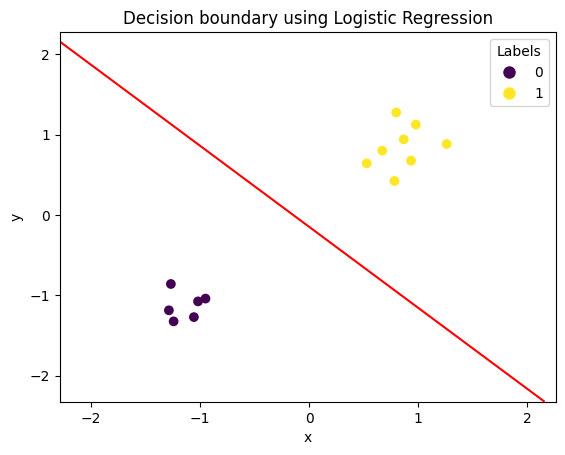

In [ ]:
# Plotting
plt.contour(a,b, h_db, [0.5], colors = 'red')
scatter = plt.scatter(X['x'], X['y'], c = y_train )
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision boundary using Logistic Regression')
unique_labels = list(set(y_train))

# Create legend handles and labels
legend_handles = []
legend_labels = []
for label in unique_labels:
    # Create a dummy scatter plot with the same color as the current label
    handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10)
    legend_handles.append(handle)
    legend_labels.append(label)

# Add legend
plt.legend(legend_handles, legend_labels, title='Labels')
plt.show()

(b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data without using any library.


In [ ]:
X_test

,x,y
0,2.587524,2.423344
17,7.952122,6.940563
15,7.225985,6.398782
1,2.111008,3.220615
8,3.541846,3.383040
5,2.514524,2.764671


In [ ]:
# weights obtained from training logistic reg. model
print(wt)

[ 7.02579997 48.18903602 47.78637662]


In [ ]:
# Outputs
y_hat = 1 / (1 + np.exp(-(wt[0] + wt[1]*X_test['x'] + wt[2]*X_test['y'])))
print(y_hat)

0     1.0
17    1.0
15    1.0
1     1.0
8     1.0
5     1.0
dtype: float64


In [ ]:
y_test

0     0
17    1
15    1
1     0
8     0
5     0
Name: labels, dtype: int64

In [ ]:
# Evaluation metrics
# Assuming you have predicted labels y_pred and true labels y_true

# Calculate the number of correct predictions
correct_predictions = sum(y_hat == y_test)

# Calculate the total number of predictions
total_predictions = len(y_hat)

# Calculate true positives
true_positives = sum((y_hat == 1) & (y_test == 1))

# Calculate false positives
false_positives = sum((y_hat == 1) & (y_test == 0))

# Calculate false negatives
false_negatives = sum((y_hat == 0) & (y_test == 1))

# Calculate accuracy
accuracy = correct_predictions / total_predictions

# Calculate precision
precision = true_positives / (true_positives + false_positives)

# Calculate recall
recall = true_positives / (true_positives + false_negatives)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)


Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 1.0
F1-Score: 0.5
